## Df + Lib

In [16]:
# df that have:
# user as numeric feature (from 0 to 5) 
# maingenre as numeric feature (from 0 to 16) --> tot 17 maingenri  
%store -r merge_unique_numain_df

In [17]:
# package that we need
import keras
from keras.models import Sequential
# we most use sequential model -> one layer after the other (sequence of layer)
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import MeanAbsolutePercentageError

#for the CROSS-VALIDATION
from sklearn.model_selection import KFold

# essential
import numpy as np
import matplotlib.pyplot as plt

# not necessary in this case
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error

## CROSS VALIDATION 

we want to try this approach in order to optimize our recomandation system, more in detail our NN

### TEST USER 1

In [39]:
# as a preliminary test in order to better understand cross validation, i try to develop it only for the user1
mask_u1=merge_unique_numain_df['User']==1
u1_df=merge_unique_numain_df[mask_u1]
u1_df.shape

(4669, 21)

In [40]:
#u1_df.isnull().sum()
# since we don't have null values we can procede in dividing the df

# TARGET_var
target='valence'

#FEATURES
features=[    'spotify_track_duration_minute', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'tempo', 'time_signature',
    'spotify_track_popularity', 'instrumentalness', 'liveness']

In [41]:
# now we can optain our variable x and y 

# TARGET
y=u1_df[target]

# FEATURES
x=u1_df[features]
display(x)

,spotify_track_duration_minute,danceability,energy,key,loudness,mode,speechiness,acousticness,tempo,time_signature,spotify_track_popularity,instrumentalness,liveness
SongID,,,,,,,,,,,,,
'65 Love AffairPaul Davis,3.66,0.647,0.686,2.0,-4.247,0.0,0.0274,0.4320,155.697,4.0,40.0,0.000006,0.1330
'til I Can Make It On My OwnTammy Wynette,3.03,0.450,0.294,7.0,-12.022,1.0,0.0318,0.8320,141.148,4.0,31.0,0.000035,0.1080
'Til My Baby Comes HomeLuther Vandross,5.54,0.804,0.714,11.0,-6.714,0.0,0.1830,0.0567,139.663,4.0,29.0,0.000006,0.0253
'Tis The Damn SeasonTaylor Swift,3.83,0.575,0.434,5.0,-8.193,1.0,0.0312,0.7350,145.916,4.0,70.0,0.000066,0.1050
('til) I Kissed YouThe Everly Brothers,2.43,0.518,0.432,10.0,-11.689,0.0,0.0459,0.4010,139.567,4.0,53.0,0.000000,0.2990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yummy Yummy YummyOhio Express,2.34,0.700,0.718,0.0,-6.967,1.0,0.0296,0.5920,131.480,4.0,39.0,0.002200,0.0999
YummyJustin Bieber,3.51,0.687,0.514,9.0,-6.612,0.0,0.0897,0.3660,145.921,4.0,74.0,0.000000,0.1160
Zack And CodeinePost Malone,3.41,0.742,0.840,5.0,-5.198,0.0,0.0471,0.1430,138.032,4.0,74.0,0.000000,0.1330


In [42]:
# we need to standardize our features

# Standardizzazione delle feature
scaler = StandardScaler()
x[features] = scaler.fit_transform(x[features])
display(x)

C:\Users\elped\AppData\Local\Temp\ipykernel_13532\3795191186.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[features] = scaler.fit_transform(x[features])


,spotify_track_duration_minute,danceability,energy,key,loudness,mode,speechiness,acousticness,tempo,time_signature,spotify_track_popularity,instrumentalness,liveness
SongID,,,,,,,,,,,,,
'65 Love AffairPaul Davis,0.014673,0.495306,0.241561,-0.899886,1.189029,-1.762504,-0.551610,0.580885,1.873478,0.194283,-0.102412,-0.230755,-0.399182
'til I Can Make It On My OwnTammy Wynette,-0.585593,-0.912422,-1.822560,0.512311,-1.075449,0.567375,-0.495981,2.067133,-0.128765,0.194283,-0.505205,-0.230545,-0.552870
'Til My Baby Comes HomeLuther Vandross,1.805941,1.617201,0.388998,1.642069,0.470512,-1.762504,1.415631,-0.813588,-0.333131,0.194283,-0.594714,-0.230755,-1.061269
'Tis The Damn SeasonTaylor Swift,0.176649,-0.019194,-1.085374,-0.052568,0.039752,0.567375,-0.503567,1.706718,0.527411,0.194283,1.240232,-0.230321,-0.571312
('til) I Kissed YouThe Everly Brothers,-1.157274,-0.426506,-1.095905,1.359629,-0.978462,-1.762504,-0.317715,0.465700,-0.346343,0.194283,0.479401,-0.230799,0.621306
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yummy Yummy YummyOhio Express,-1.243026,0.874035,0.410060,-1.464765,0.396826,0.567375,-0.523795,1.175384,-1.459281,0.194283,-0.147166,-0.214866,-0.602665
YummyJustin Bieber,-0.128248,0.781139,-0.664125,1.077190,0.500220,-1.762504,0.236045,0.335654,0.528099,0.194283,1.419251,-0.230799,-0.503690
Zack And CodeinePost Malone,-0.223528,1.174160,1.052465,-0.052568,0.912049,-1.762504,-0.302544,-0.492930,-0.557590,0.194283,1.419251,-0.230799,-0.399182


In [43]:
# Definition of the parameters of the kfold cross-validation
# the folds are generally 5 or 10 
# the folds indicate in wich part we divide the df, each folds have a similar dimension 
# in this way:

#Run k iterations of training and validation:

#Iteration 1: Trained on Fold 2-3-4-5, valid on Fold 1
#Iteration 2: Trained on Fold 1-3-4-5, valid on Fold 2
#And so on, until you have used each fold as a validation set once.

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

display(kf)

KFold(n_splits=5, random_state=42, shuffle=True)

In [44]:
# now we can define a function in order to build our NN

def create_model():
        model = Sequential()
        model.add(Dense(32, activation='relu', input_shape=(x.shape[1],)))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(1))  # Output --> valence
        model.compile(optimizer=Adam(learning_rate=0.001), loss='mse',metrics=['mae'])
        return model

In [45]:
# we define a list in order to save the error for each fold
mse_scores=[]

In [ ]:
# for data set user i = 0,...4
    #kfold = 3 sul dataset dello user i
    #for lop 0,..,3

In [52]:
# now we have to divide the df in train and test, following the cross validatin process
i = 0
for train_index, val_index in kf.split(x): #
    print(f'train index k:', i )
    #display(train_index)
    #print(f'test index k:', i)
    #display(val_index)
    X_train, X_val = x.iloc[train_index], x.iloc[val_index]
    display(X_train)
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    i = i+1


    #modello



train index k: 0


,spotify_track_duration_minute,danceability,energy,key,loudness,mode,speechiness,acousticness,tempo,time_signature,spotify_track_popularity,instrumentalness,liveness
SongID,,,,,,,,,,,,,
'65 Love AffairPaul Davis,0.014673,0.495306,0.241561,-0.899886,1.189029,-1.762504,-0.551610,0.580885,1.873478,0.194283,-0.102412,-0.230755,-0.399182
'til I Can Make It On My OwnTammy Wynette,-0.585593,-0.912422,-1.822560,0.512311,-1.075449,0.567375,-0.495981,2.067133,-0.128765,0.194283,-0.505205,-0.230545,-0.552870
'Til My Baby Comes HomeLuther Vandross,1.805941,1.617201,0.388998,1.642069,0.470512,-1.762504,1.415631,-0.813588,-0.333131,0.194283,-0.594714,-0.230755,-1.061269
'Tis The Damn SeasonTaylor Swift,0.176649,-0.019194,-1.085374,-0.052568,0.039752,0.567375,-0.503567,1.706718,0.527411,0.194283,1.240232,-0.230321,-0.571312
('til) I Kissed YouThe Everly Brothers,-1.157274,-0.426506,-1.095905,1.359629,-0.978462,-1.762504,-0.317715,0.465700,-0.346343,0.194283,0.479401,-0.230799,0.621306
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yuck!2 Chainz Featuring Lil Wayne,1.091339,0.430993,1.289418,1.642069,1.158156,-1.762504,2.376495,1.450340,1.079683,0.194283,0.031853,-0.230082,-0.263937
YuckLogic,-0.718985,0.380973,0.868169,1.642069,0.852925,-1.762504,3.767218,-0.303433,1.896461,0.194283,0.792684,-0.230799,-0.405329
Yummy Yummy YummyOhio Express,-1.243026,0.874035,0.410060,-1.464765,0.396826,0.567375,-0.523795,1.175384,-1.459281,0.194283,-0.147166,-0.214866,-0.602665


train index k: 1


,spotify_track_duration_minute,danceability,energy,key,loudness,mode,speechiness,acousticness,tempo,time_signature,spotify_track_popularity,instrumentalness,liveness
SongID,,,,,,,,,,,,,
'til I Can Make It On My OwnTammy Wynette,-0.585593,-0.912422,-1.822560,0.512311,-1.075449,0.567375,-0.495981,2.067133,-0.128765,0.194283,-0.505205,-0.230545,-0.552870
'Til My Baby Comes HomeLuther Vandross,1.805941,1.617201,0.388998,1.642069,0.470512,-1.762504,1.415631,-0.813588,-0.333131,0.194283,-0.594714,-0.230755,-1.061269
'Tis The Damn SeasonTaylor Swift,0.176649,-0.019194,-1.085374,-0.052568,0.039752,0.567375,-0.503567,1.706718,0.527411,0.194283,1.240232,-0.230321,-0.571312
('til) I Kissed YouThe Everly Brothers,-1.157274,-0.426506,-1.095905,1.359629,-0.978462,-1.762504,-0.317715,0.465700,-0.346343,0.194283,0.479401,-0.230799,0.621306
(Closest Thing To) PerfectJermaine Jackson,0.186177,0.595347,0.647013,0.229872,-1.128456,-1.762504,-0.485867,-0.948094,1.085875,0.194283,-1.534565,-0.228575,1.131549
...,...,...,...,...,...,...,...,...,...,...,...,...,...
YuckLogic,-0.718985,0.380973,0.868169,1.642069,0.852925,-1.762504,3.767218,-0.303433,1.896461,0.194283,0.792684,-0.230799,-0.405329
Yummy Yummy YummyOhio Express,-1.243026,0.874035,0.410060,-1.464765,0.396826,0.567375,-0.523795,1.175384,-1.459281,0.194283,-0.147166,-0.214866,-0.602665
YummyJustin Bieber,-0.128248,0.781139,-0.664125,1.077190,0.500220,-1.762504,0.236045,0.335654,0.528099,0.194283,1.419251,-0.230799,-0.503690


train index k: 2


,spotify_track_duration_minute,danceability,energy,key,loudness,mode,speechiness,acousticness,tempo,time_signature,spotify_track_popularity,instrumentalness,liveness
SongID,,,,,,,,,,,,,
'65 Love AffairPaul Davis,0.014673,0.495306,0.241561,-0.899886,1.189029,-1.762504,-0.551610,0.580885,1.873478,0.194283,-0.102412,-0.230755,-0.399182
'til I Can Make It On My OwnTammy Wynette,-0.585593,-0.912422,-1.822560,0.512311,-1.075449,0.567375,-0.495981,2.067133,-0.128765,0.194283,-0.505205,-0.230545,-0.552870
'Til My Baby Comes HomeLuther Vandross,1.805941,1.617201,0.388998,1.642069,0.470512,-1.762504,1.415631,-0.813588,-0.333131,0.194283,-0.594714,-0.230755,-1.061269
'Tis The Damn SeasonTaylor Swift,0.176649,-0.019194,-1.085374,-0.052568,0.039752,0.567375,-0.503567,1.706718,0.527411,0.194283,1.240232,-0.230321,-0.571312
('til) I Kissed YouThe Everly Brothers,-1.157274,-0.426506,-1.095905,1.359629,-0.978462,-1.762504,-0.317715,0.465700,-0.346343,0.194283,0.479401,-0.230799,0.621306
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yummy Yummy YummyOhio Express,-1.243026,0.874035,0.410060,-1.464765,0.396826,0.567375,-0.523795,1.175384,-1.459281,0.194283,-0.147166,-0.214866,-0.602665
YummyJustin Bieber,-0.128248,0.781139,-0.664125,1.077190,0.500220,-1.762504,0.236045,0.335654,0.528099,0.194283,1.419251,-0.230799,-0.503690
Zack And CodeinePost Malone,-0.223528,1.174160,1.052465,-0.052568,0.912049,-1.762504,-0.302544,-0.492930,-0.557590,0.194283,1.419251,-0.230799,-0.399182


train index k: 3


,spotify_track_duration_minute,danceability,energy,key,loudness,mode,speechiness,acousticness,tempo,time_signature,spotify_track_popularity,instrumentalness,liveness
SongID,,,,,,,,,,,,,
'65 Love AffairPaul Davis,0.014673,0.495306,0.241561,-0.899886,1.189029,-1.762504,-0.551610,0.580885,1.873478,0.194283,-0.102412,-0.230755,-0.399182
'Tis The Damn SeasonTaylor Swift,0.176649,-0.019194,-1.085374,-0.052568,0.039752,0.567375,-0.503567,1.706718,0.527411,0.194283,1.240232,-0.230321,-0.571312
('til) I Kissed YouThe Everly Brothers,-1.157274,-0.426506,-1.095905,1.359629,-0.978462,-1.762504,-0.317715,0.465700,-0.346343,0.194283,0.479401,-0.230799,0.621306
(Closest Thing To) PerfectJermaine Jackson,0.186177,0.595347,0.647013,0.229872,-1.128456,-1.762504,-0.485867,-0.948094,1.085875,0.194283,-1.534565,-0.228575,1.131549
(Dance The) Mess AroundChubby Checker,-1.223970,-0.240714,0.446920,-1.182326,0.371487,-1.762504,0.061573,-0.799469,-0.034770,0.194283,-1.310791,-0.230799,-0.528280
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yuck!2 Chainz Featuring Lil Wayne,1.091339,0.430993,1.289418,1.642069,1.158156,-1.762504,2.376495,1.450340,1.079683,0.194283,0.031853,-0.230082,-0.263937
YuckLogic,-0.718985,0.380973,0.868169,1.642069,0.852925,-1.762504,3.767218,-0.303433,1.896461,0.194283,0.792684,-0.230799,-0.405329
YummyJustin Bieber,-0.128248,0.781139,-0.664125,1.077190,0.500220,-1.762504,0.236045,0.335654,0.528099,0.194283,1.419251,-0.230799,-0.503690


train index k: 4


,spotify_track_duration_minute,danceability,energy,key,loudness,mode,speechiness,acousticness,tempo,time_signature,spotify_track_popularity,instrumentalness,liveness
SongID,,,,,,,,,,,,,
'65 Love AffairPaul Davis,0.014673,0.495306,0.241561,-0.899886,1.189029,-1.762504,-0.551610,0.580885,1.873478,0.194283,-0.102412,-0.230755,-0.399182
'til I Can Make It On My OwnTammy Wynette,-0.585593,-0.912422,-1.822560,0.512311,-1.075449,0.567375,-0.495981,2.067133,-0.128765,0.194283,-0.505205,-0.230545,-0.552870
'Til My Baby Comes HomeLuther Vandross,1.805941,1.617201,0.388998,1.642069,0.470512,-1.762504,1.415631,-0.813588,-0.333131,0.194283,-0.594714,-0.230755,-1.061269
(Dance The) Mess AroundChubby Checker,-1.223970,-0.240714,0.446920,-1.182326,0.371487,-1.762504,0.061573,-0.799469,-0.034770,0.194283,-1.310791,-0.230799,-0.528280
(Do You) Wanna RideReel Tight,-0.090136,1.281347,0.099389,0.229872,0.816810,0.567375,-0.011756,-0.336874,-0.555801,0.194283,-1.579320,-0.230799,-0.802459
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yummy Yummy YummyOhio Express,-1.243026,0.874035,0.410060,-1.464765,0.396826,0.567375,-0.523795,1.175384,-1.459281,0.194283,-0.147166,-0.214866,-0.602665
YummyJustin Bieber,-0.128248,0.781139,-0.664125,1.077190,0.500220,-1.762504,0.236045,0.335654,0.528099,0.194283,1.419251,-0.230799,-0.503690
Zack And CodeinePost Malone,-0.223528,1.174160,1.052465,-0.052568,0.912049,-1.762504,-0.302544,-0.492930,-0.557590,0.194283,1.419251,-0.230799,-0.399182


In [26]:
# now we can build and create the model
model_u1 = create_model()
h_model_u1=model_u1.fit(X_train, y_train, epochs=20,validation_split=0.2, batch_size=32, verbose=0)

c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model_u1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,981 (11.65 KB)

 Trainable params: 993 (3.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,988 (7.77 KB)

In [28]:
#evaluation of the model
y_pred = model_u1.predict(X_val).flatten()
mse = mean_squared_error(y_val, y_pred)
mse_scores.append(mse)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [29]:
# Calcolo della media e deviazione standard del MSE
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f'MSE medio: {mean_mse:.4f}')
print(f'Deviazione standard del MSE: {std_mse:.4f}')

MSE medio: 0.0337
Deviazione standard del MSE: 0.0000


This is the result of the mae that we obtain from the 'basic' methond **train/test split**

MSE user1: 0.03147273977545834 

We don't see significant improvements from a MSE pov, this is normal because the real **AIM of this procedure** is to obtain estimation that are **more robust**, so we don't have to evaluete the result of this metrics in order to compare the two method.

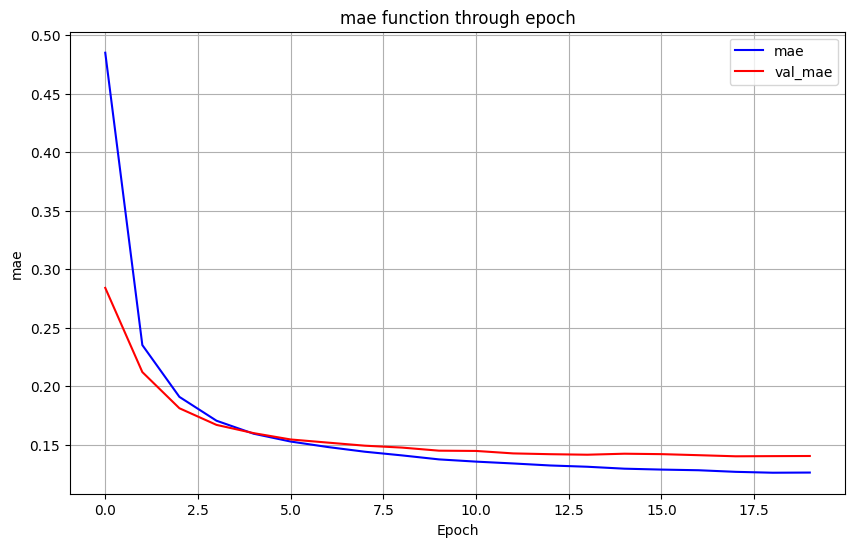

In [30]:
# we can try to perform some plots
plt.figure(figsize=(10,6))
plt.plot(h_model_u1.history['mae'],color='blue',label='mae')
plt.plot(h_model_u1.history['val_mae'],color='red',label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.title('mae function through epoch')
plt.legend()
plt.grid()
plt.show()

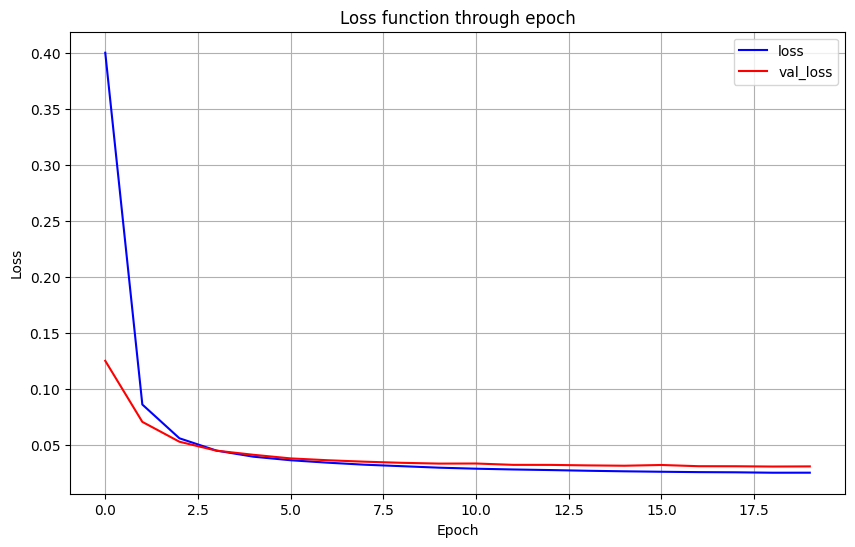

In [31]:
plt.figure(figsize=(10,6))
plt.plot(h_model_u1.history['loss'],color='blue',label='loss')
plt.plot(h_model_u1.history['val_loss'],color='red',label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss function through epoch')
plt.legend()
plt.grid()
plt.show()

### So, how can we evaluate if one method is better that the other ?

1) Evaluate the std, if the std is lesser, this means that our esimation is better than the other since we have less oscillation 

2) Metrics (mse, mae)

3) Statistics test 

4) Learning rate

In [32]:
# if we look at the std for example in the model with the cross validation, we see:
print(f'MSE medio: {mean_mse:.4f}')
print(f'Deviazione standard del MSE: {std_mse:.4f}') 

# we have 0 std --> WE HAVE TO CHECK IT ALSO FROM THE STANDARD METHOD IN THE NN FILE

MSE medio: 0.0337
Deviazione standard del MSE: 0.0000


## GENARALIZE CRSS VALIDATION - all users

In [33]:
# TARGET_var
target='valence'

#FEATURES
features=[    'spotify_track_duration_minute', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'tempo', 'time_signature',
    'spotify_track_popularity', 'instrumentalness', 'liveness']

### DEFINE FUNCTIONS

In [34]:
####################
### CREATE MODEL ###
####################


# function to create the model
def create_model_user(shape_x_train): #number of columns -> shape
    
    
    model_user_i = Sequential([
        Dense(32, input_dim=shape_x_train, activation='relu', name='first_layer'),
        # 64 as the number of initial layer is a common choice when we build a NN --> VEDIAMO COME FUNZIA POI NEL CASO SI SISTEMA IN SEGUITO
        # input_dim: take the dimension of the x_train array --> that is equivalent to the number of feature in input
        
        # SI POSSONO AGGIUNGERE PER OGNI LAYER --> Dropout(0.3) per evitare overfitting
        

        Dense(16, activation='relu', name='secod_layer'),
        Dense(1, activation='linear', name='final_layer')
    ])

    #compile the model
    model_user_i.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

    #summary
    #display(model_user_i.summary())

    #return  the model
    return model_user_i

#################
### FIT MODEL ###
#################

#function to train the model
def fit_model(model, x_train, y_train, x_test, y_test):

    history_model = model.fit(
        x_train,y_train,
        #validation_split=0.2,
        validation_data = [x_test, y_test],
        epochs=30,
        batch_size=32,
        #verbose=1
    )

    return history_model

############
### PLOT ###
############

def plot_for_model(history, y_hat, x_test):

    #plot loss
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'],color='blue',label='loss')
    plt.plot(history.history['val_loss'],color='red',label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss function through epoch')
    plt.legend()
    plt.grid()
    plt.show()

    #plot mean
    plt.figure(figsize=(10,6))
    plt.plot(history.history['mae'],color='blue',label='mae')
    plt.plot(history.history['val_mae'],color='red',label='val_mae')
    plt.xlabel('Epoch')
    plt.ylabel('mae')
    plt.title('Mae function through epoch')
    plt.grid()
    plt.legend()
    plt.show()   

    # plot 
    # aggiunto A.L
    plt.figure(figsize=(12,6))
    plt.plot(y_test, color='r')
    plt.plot(y_hat, color='b') #attenzione alcune predizione sono negative
    plt.title('Prediction')
    plt.legend()
    plt.show()

### MAIN

c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2519 - mae: 0.3867 - val_loss: 0.0590 - val_mae: 0.1915
Epoch 2/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0548 - mae: 0.1878 - val_loss: 0.0461 - val_mae: 0.1686
Epoch 3/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0411 - mae: 0.1628 - val_loss: 0.0404 - val_mae: 0.1580
Epoch 4/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0373 - mae: 0.1550 - val_loss: 0.0376 - val_mae: 0.1535
Epoch 5/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0337 - mae: 0.1469 - val_loss: 0.0356 - val_mae: 0.1497
Epoch 6/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0315 - mae: 0.1420 - val_loss: 0.0355 - val_mae: 0.1489
Epoch 7/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0312 - mae: 0.1422 - val_loss: 0.0350 - val_mae: 0.1478
Epoch 8/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0289 - mae: 0.1366 - val_loss: 0.0351 - val_mae: 0.1473
Epoch 9/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

,Song,Performer,valence
SongID,,,
...Baby One More TimeBritney Spears,...Baby One More Time,Britney Spears,0.907
(everybody Wanna Get Rich) Rite AwayDr. John,(everybody Wanna Get Rich) Rite Away,Dr. John,0.971
(For God's Sake) Give More Power To The PeopleThe Chi-lites,(For God's Sake) Give More Power To The People,The Chi-lites,0.899
(I Know I Got) SkillzShaquille O'Neal,(I Know I Got) Skillz,Shaquille O'Neal,0.637
(I Know) I'm Losing YouRare Earth,(I Know) I'm Losing You,Rare Earth,0.790
...,...,...,...
Don't Turn AroundAce Of Base,Don't Turn Around,Ace Of Base,0.752
"Don't Wake Me Up In The Morning, MichaelPeppermint Rainbow","Don't Wake Me Up In The Morning, Michael",Peppermint Rainbow,0.915
Don't You Know How Much I Love YouRonnie Milsap,Don't You Know How Much I Love You,Ronnie Milsap,0.858


-----------------------------------------------------
---------------------------------------------------------
USER 0


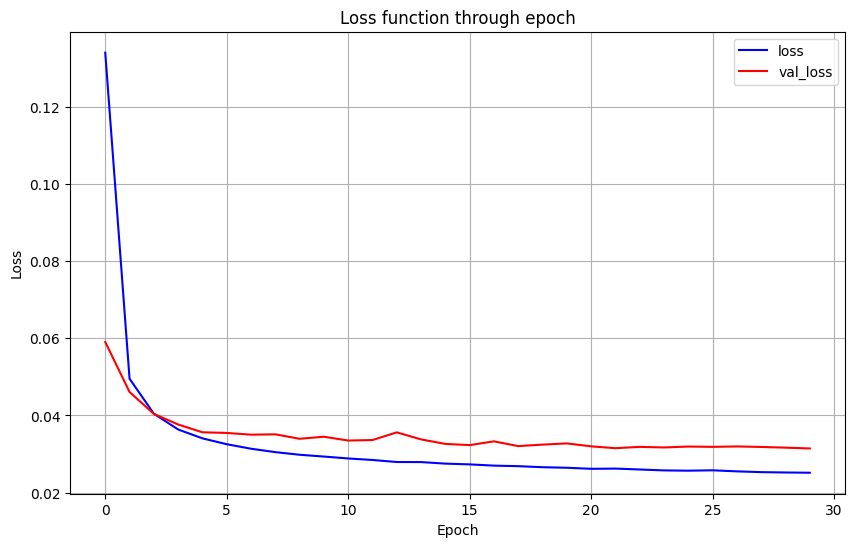

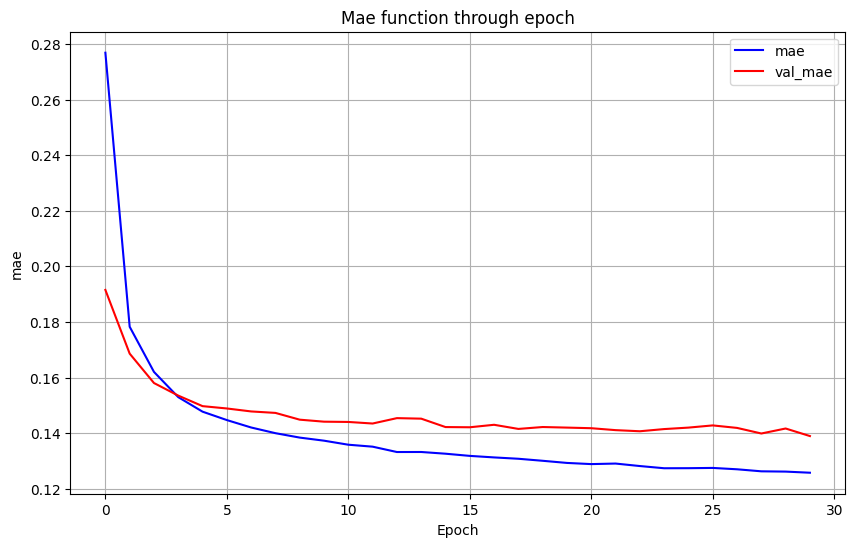

C:\Users\elped\AppData\Local\Temp\ipykernel_13532\250368514.py:83: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


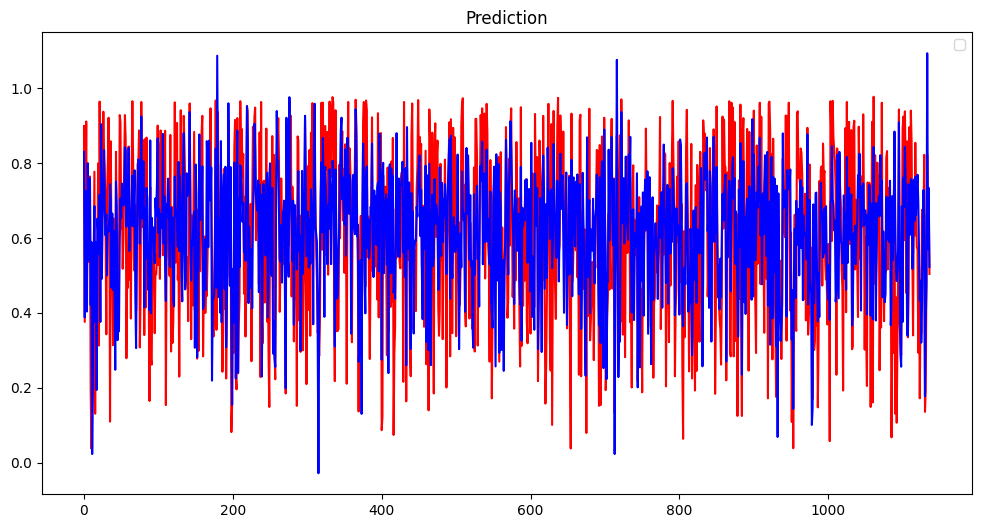

MSE


0.03142988235987879

Epoch 1/30


c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1194 - mae: 0.2715 - val_loss: 0.0590 - val_mae: 0.1955
Epoch 2/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0528 - mae: 0.1817 - val_loss: 0.0461 - val_mae: 0.1691
Epoch 3/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0403 - mae: 0.1608 - val_loss: 0.0417 - val_mae: 0.1584
Epoch 4/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0358 - mae: 0.1513 - val_loss: 0.0390 - val_mae: 0.1540
Epoch 5/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0325 - mae: 0.1437 - val_loss: 0.0368 - val_mae: 0.1492
Epoch 6/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0288 - mae: 0.1362 - val_loss: 0.0354 - val_mae: 0.1473
Epoch 7/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0299 - mae: 0.1399 - val_loss: 0.0360 - val_mae: 0.1463
Epoch 8/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0276 - mae: 0.1327 - val_loss: 0.0358 - val_mae: 0.1453
Epoch 9/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0278 

,Song,Performer,valence
SongID,,,
'Til My Baby Comes HomeLuther Vandross,'Til My Baby Comes Home,Luther Vandross,0.802
(Closest Thing To) PerfectJermaine Jackson,(Closest Thing To) Perfect,Jermaine Jackson,0.905
(I Can't Get No) SatisfactionThe Rolling Stones,(I Can't Get No) Satisfaction,The Rolling Stones,0.904
(I'm Not Your) Steppin' StoneThe Monkees,(I'm Not Your) Steppin' Stone,The Monkees,0.324
(I've Got) Spring FeverLittle Willie John,(I've Got) Spring Fever,Little Willie John,0.730
...,...,...,...
Don't Know What You Got (Till It's Gone)Cinderella,Don't Know What You Got (Till It's Gone),Cinderella,0.232
Don't Leave Me This WayThe Communards,Don't Leave Me This Way,The Communards,0.901
Don't Let GoIsaac Hayes,Don't Let Go,Isaac Hayes,0.962


-----------------------------------------------------
---------------------------------------------------------
USER 1


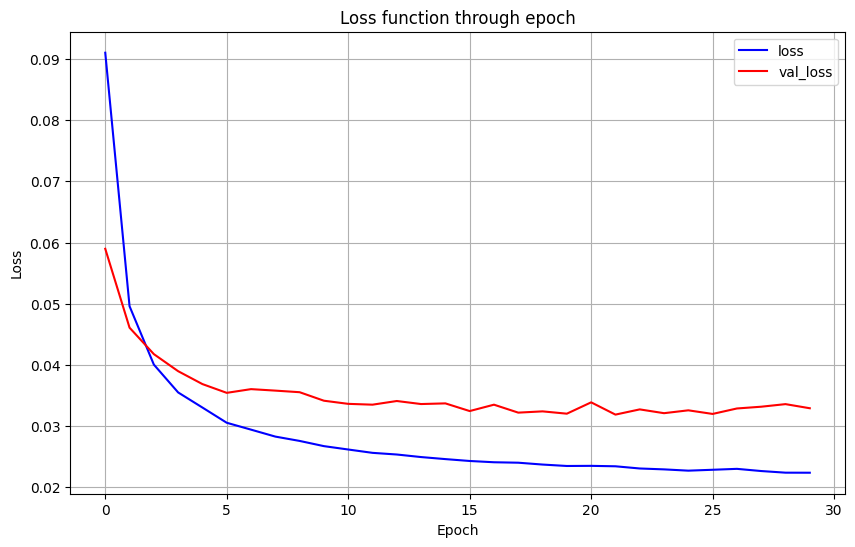

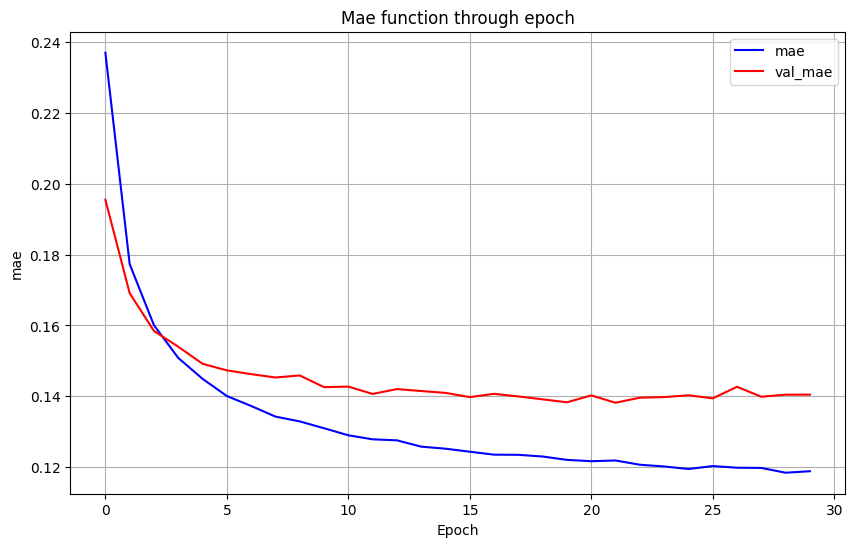

C:\Users\elped\AppData\Local\Temp\ipykernel_13532\250368514.py:83: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


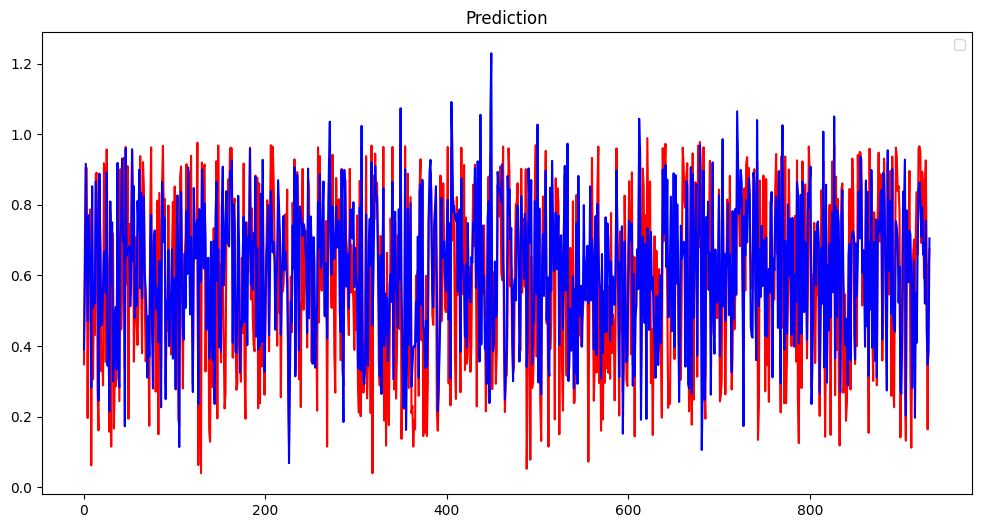

MSE


0.032894686668269404

Epoch 1/30


c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2564 - mae: 0.3666 - val_loss: 0.0382 - val_mae: 0.1416
Epoch 2/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0337 - mae: 0.1305 - val_loss: 0.0273 - val_mae: 0.1121
Epoch 3/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0252 - mae: 0.1080 - val_loss: 0.0246 - val_mae: 0.1065
Epoch 4/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0221 - mae: 0.1013 - val_loss: 0.0228 - val_mae: 0.1064
Epoch 5/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0208 - mae: 0.0978 - val_loss: 0.0218 - val_mae: 0.1008
Epoch 6/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0201 - mae: 0.0966 - val_loss: 0.0214 - val_mae: 0.1006
Epoch 7/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0199 - mae: 0.0948 - val_loss: 0.0206 - val_mae: 0.0962
Epoch 8/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0190 - mae: 0.0923 - val_loss: 0.0207 - val_mae: 0.0995
Epoch 9/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0187 

,Song,Performer,valence
SongID,,,
'Til Summer Comes AroundKeith Urban,'Til Summer Comes Around,Keith Urban,0.308
"""Joy"" Pt. IIsaac Hayes","""Joy"" Pt. I",Isaac Hayes,0.690
"""Roots"" MedleyQuincy Jones","""Roots"" Medley",Quincy Jones,0.650
(1-2-3-4-5-6-7) Count The DaysInez & Charlie Foxx,(1-2-3-4-5-6-7) Count The Days,Inez & Charlie Foxx,0.630
(Baby Tell Me) Can You DanceShanice Wilson,(Baby Tell Me) Can You Dance,Shanice Wilson,0.630
...,...,...,...
DominoesRobbie Nevil,Dominoes,Robbie Nevil,0.952
Don QuichotteMagazine 60,Don Quichotte,Magazine 60,0.867
Don't Be A Drop-OutJames Brown And The Famous Flames,Don't Be A Drop-Out,James Brown And The Famous Flames,0.690


-----------------------------------------------------
---------------------------------------------------------
USER 2


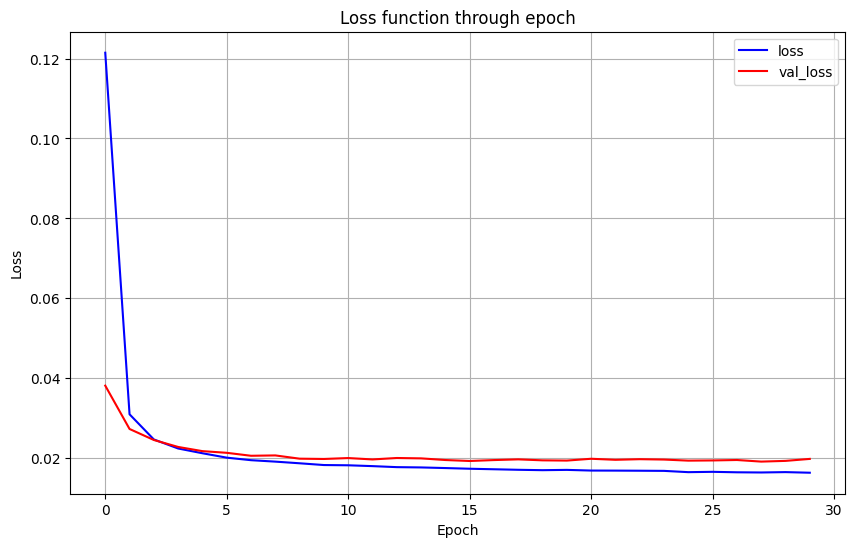

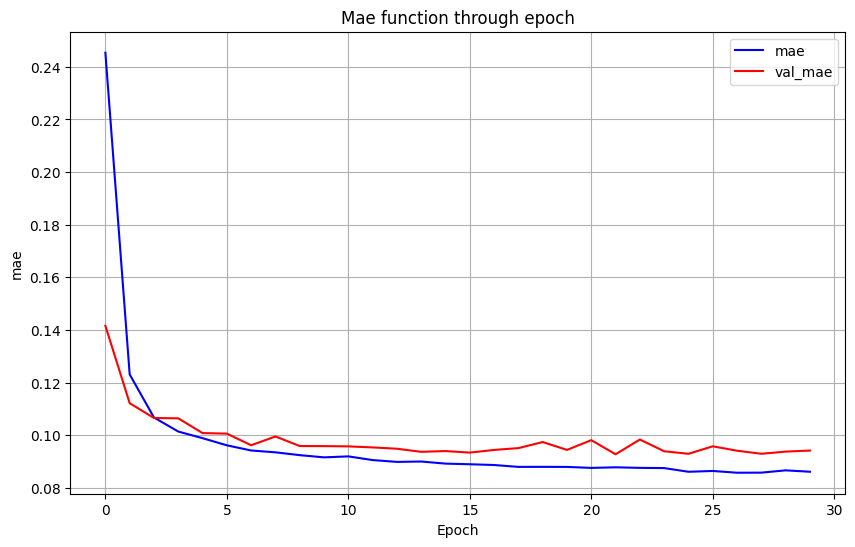

C:\Users\elped\AppData\Local\Temp\ipykernel_13532\250368514.py:83: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


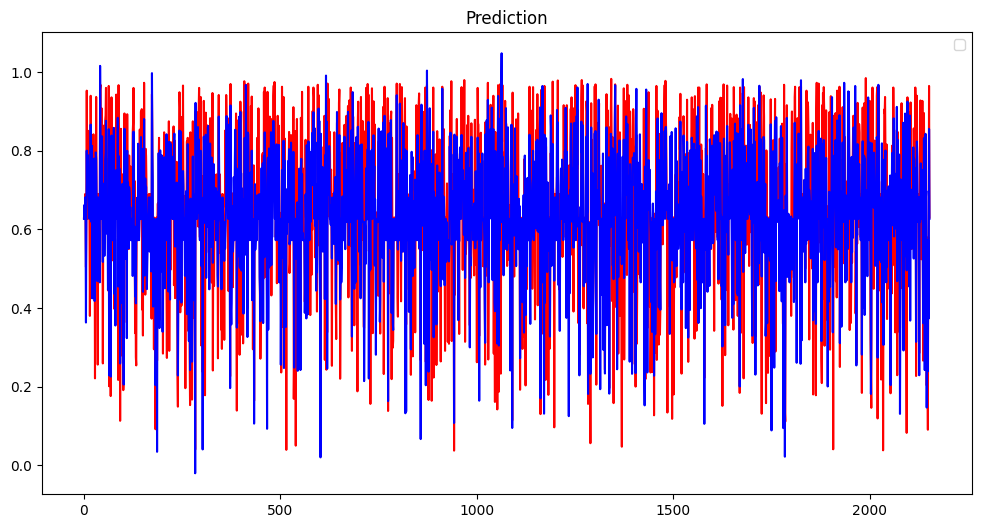

MSE


0.01984439140404942

Epoch 1/30


c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3730 - mae: 0.3887 - val_loss: 0.0721 - val_mae: 0.2126
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0703 - mae: 0.2081 - val_loss: 0.0517 - val_mae: 0.1823
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0523 - mae: 0.1751 - val_loss: 0.0429 - val_mae: 0.1663
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0425 - mae: 0.1604 - val_loss: 0.0383 - val_mae: 0.1561
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0368 - mae: 0.1497 - val_loss: 0.0355 - val_mae: 0.1500
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0349 - mae: 0.1455 - val_loss: 0.0335 - val_mae: 0.1453
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0318 - mae: 0.1394 - val_loss: 0.0320 - val_mae: 0.1413
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0338 - mae: 0.1435 - val_loss: 0.0307 - val_mae: 0.1392
Epoch 9/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0300 - mae: 0.1347 - va

,Song,Performer,valence
SongID,,,
(I've Got) BonnieBobby Rydell,(I've Got) Bonnie,Bobby Rydell,0.698
(There's Gotta Be) More To LifeStacie Orrico,(There's Gotta Be) More To Life,Stacie Orrico,0.649
(There's No Place Like) Home For The HolidaysPerry Como,(There's No Place Like) Home For The Holidays,Perry Como,0.735
(There's) Always Something There To Remind MeDionne Warwick,(There's) Always Something There To Remind Me,Dionne Warwick,0.821
5 O'ClockNonchalant,5 O'Clock,Nonchalant,0.800
...,...,...,...
Don't Come Out The HouseMetro Boomin Featuring 21 Savage,Don't Come Out The House,Metro Boomin Featuring 21 Savage,0.175
Don't Cry No MoreBobby Bland,Don't Cry No More,Bobby Bland,0.890
Don't Cry Out LoudMelissa Manchester,Don't Cry Out Loud,Melissa Manchester,0.278


-----------------------------------------------------
---------------------------------------------------------
USER 3


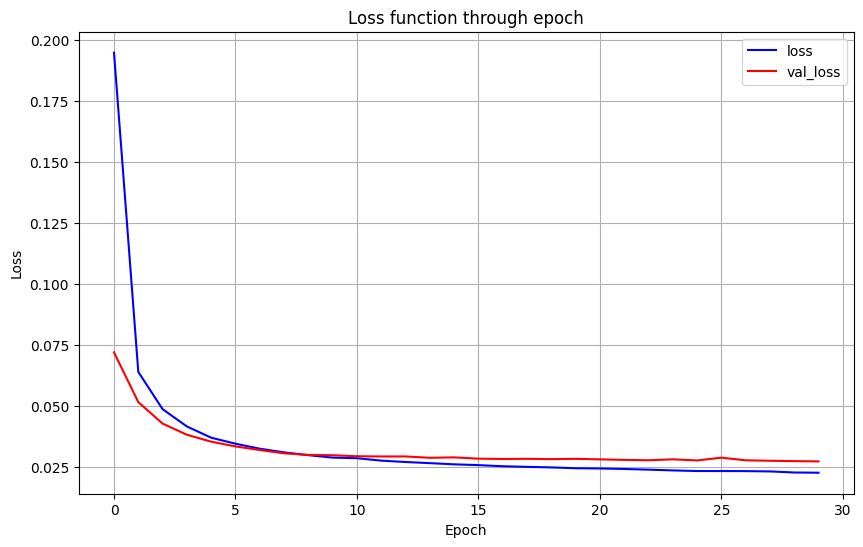

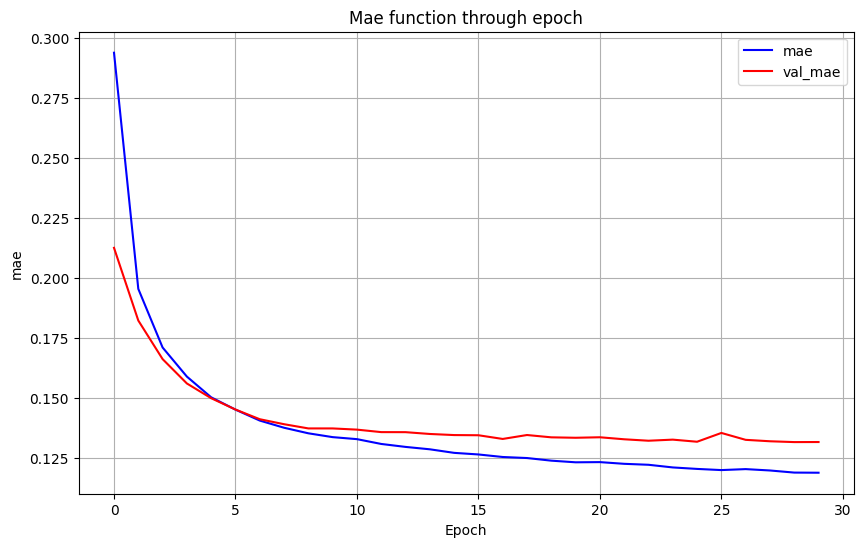

C:\Users\elped\AppData\Local\Temp\ipykernel_13532\250368514.py:83: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


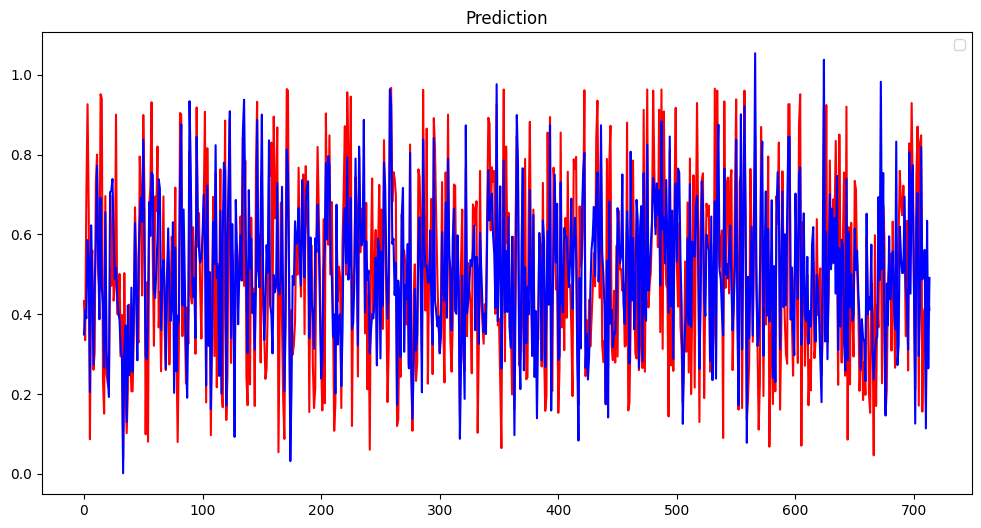

MSE


0.027387446330279782

Epoch 1/30


c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2137 - mae: 0.3648 - val_loss: 0.0768 - val_mae: 0.2223
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0692 - mae: 0.2121 - val_loss: 0.0569 - val_mae: 0.1935
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0530 - mae: 0.1857 - val_loss: 0.0487 - val_mae: 0.1793
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0415 - mae: 0.1627 - val_loss: 0.0447 - val_mae: 0.1728
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0382 - mae: 0.1579 - val_loss: 0.0422 - val_mae: 0.1684
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0363 - mae: 0.1535 - val_loss: 0.0396 - val_mae: 0.1628
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0334 - mae: 0.1473 - val_loss: 0.0380 - val_mae: 0.1588
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0306 - mae: 0.1403 - val_loss: 0.0360 - val_mae: 0.1550
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0300 - mae: 0.1397 - va

,Song,Performer,valence
SongID,,,
'TilThe Angels,'Til,The Angels,0.307
"(Girls, Girls, Girls) Made To LoveEddie Hodges","(Girls, Girls, Girls) Made To Love",Eddie Hodges,0.519
(if You Add) All The Love In The WorldMac Davis,(if You Add) All The Love In The World,Mac Davis,0.359
(Sittin' On) The Dock Of The BayMichael Bolton,(Sittin' On) The Dock Of The Bay,Michael Bolton,0.565
(There's) No Gettin' Over MeRonnie Milsap,(There's) No Gettin' Over Me,Ronnie Milsap,0.787
...,...,...,...
Don't Let GoCommander Cody,Don't Let Go,Commander Cody,0.867
Don't Look BackThe Temptations,Don't Look Back,The Temptations,0.902
Don't Make Me OverDionne Warwick,Don't Make Me Over,Dionne Warwick,0.503


-----------------------------------------------------
---------------------------------------------------------
USER 4


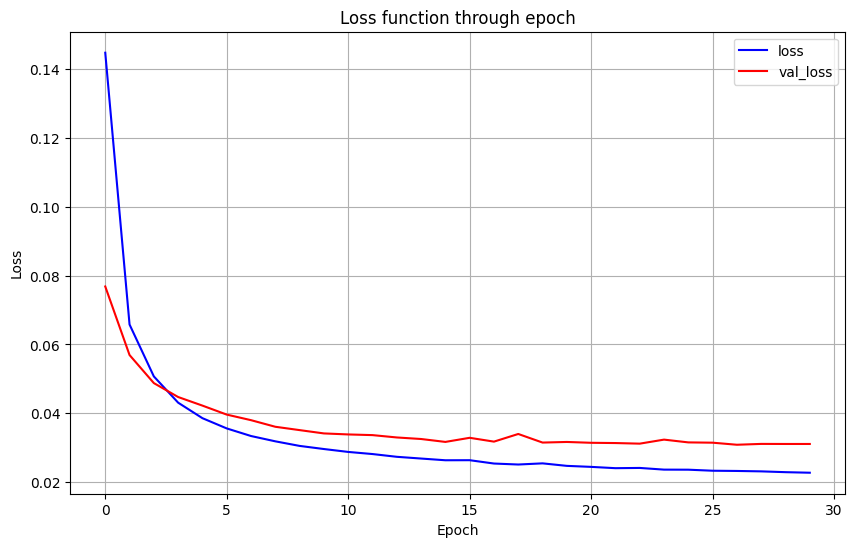

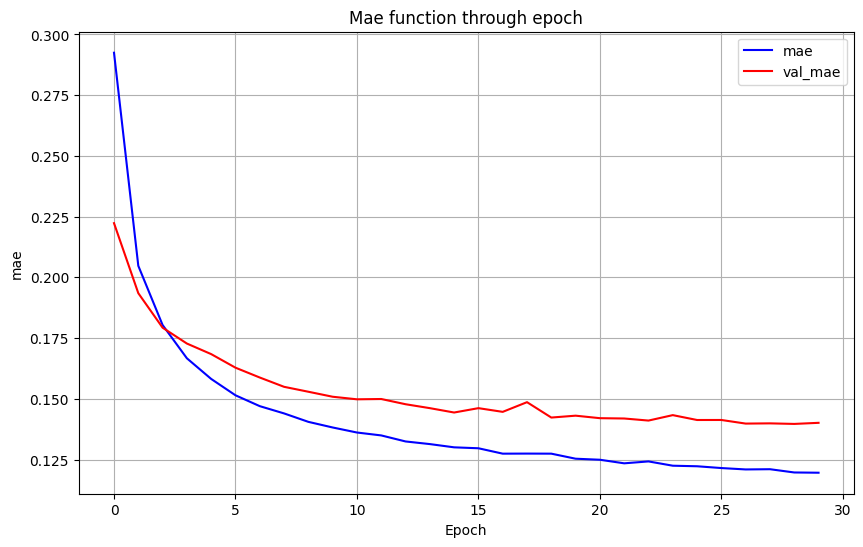

C:\Users\elped\AppData\Local\Temp\ipykernel_13532\250368514.py:83: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


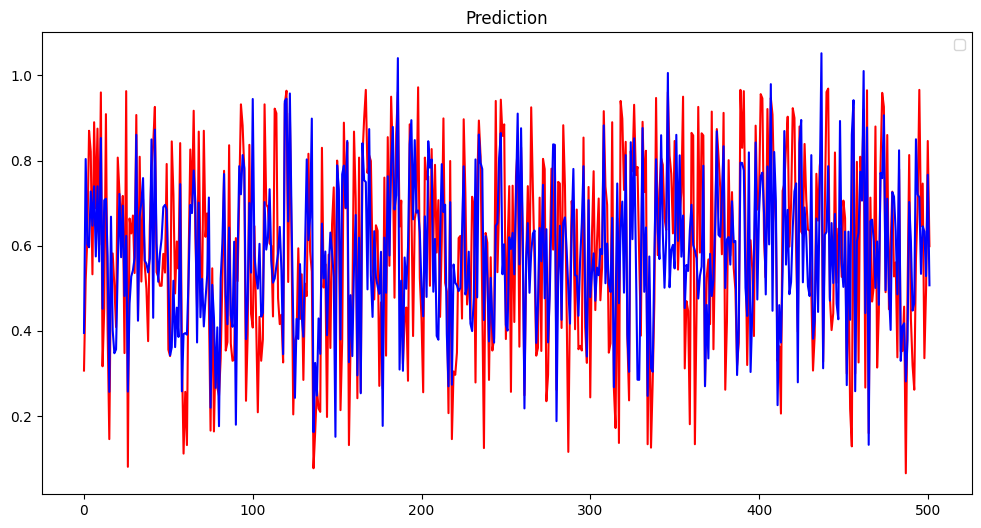

MSE


0.031043277549839918

In [35]:
dizio_model_user = {} #in this dizio we store the model for each user

# DICTIONARY TO STORE SONG RECOMMENDATION PER USER
reccomandations_songs_per_user={}

#loop creation user and model
for i in range(0, len(merge_unique_numain_df['User'].unique())): #i indica lo user   

    #select user
    mask_user = merge_unique_numain_df['User'] == i
    #display(mask_user)
    user_i_df = merge_unique_numain_df[mask_user]
    #display(user_i_df) 

    #extract the feature and target
    x = user_i_df[features]
    y = user_i_df[target]

    #normalization
    x_scaled = StandardScaler().fit_transform(x)


    ######################
    ## CROSS VALIDATION ##
    ######################
    
    k = 5
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    '''
    #split; serve farlo? non se ne occupa il fit? chiedere
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)
    #display(x_train)
    '''
    
    #################
    ## TRAIN/SPLIT ##
    #################

    for train_index, val_index in kf.split(x_scaled):
        x_train, x_test = x_scaled[train_index], x_scaled[val_index]
        y_train, y_test = y.iloc[train_index], y.iloc[val_index]

    #conversion
    y_train=np.array(y_train)
    y_test=np.array(y_test)

    #creation model for the specific user
    model_user_i = create_model_user(x_train.shape[1])
    
    #fit the model with the different x, y train (for different user)
    history_model_user_i = fit_model(model_user_i, x_train, y_train, x_test, y_test)

    #test no function
    '''history_model_user_i = model_user_i.fit(
        x_train,y_train,
        #validation_split=0.2,
        validation_data = [x_test, y_test],
        epochs=30,
        batch_size=32,
        #verbose=1
    )'''

    # AGGIUNTO A.L.
    #y_hat=model_user_i.predict(x_train)
    y_hat = model_user_i.predict(x_test)

    ###################################
    ###################################
    # AGGIUNTO A.L. --> RECOMANDATION #
    ###################################
    ###################################

    #in order to have indices match between y_hat and x_test
    x_test_indices=user_i_df.iloc[np.arange(len(y_hat))].index
    # Threshold for raccommendations --> valence > 0.7
    reccomended_songs=user_i_df.loc[x_test_indices][y_hat.flatten()>0.7] # filtet songs with valence > 0.7

    # in order to visualize reccomandation
    print(f'\nReccomendations for User{i}:')
    if reccomended_songs.empty:
        print('No songs recommended based on valence threshold')
    else:
        display(reccomended_songs[['Song','Performer','valence']])

    # Now we want to save recommendation in dictionary
    reccomandations_songs_per_user['User{i}']=reccomended_songs

    #QUALCOSA NON QUADRA --> AGGIUNGE AL DIZIONARIO ANCHE CANZONI CON VALENCE > 0.7

    print('-----------------------------------------------------')

    #plot the metrics of the model
    print('---------------------------------------------------------')
    print(f'USER {i}')
    plot_for_model(history_model_user_i, y_hat, x_test)

    #compute MSE
    print('MSE')
    mse = mean_squared_error(y_test, y_hat)
    display(mse)

    #save the model in the dictionary
    #add also the raccomandations
    dizio_model_user[f"User{i}"] = {'model_user_i' : model_user_i,
                                    'history_model_user_i': history_model_user_i,
                                    'x_train': x_train,
                                    'x_test': x_test,
                                    'y_train': y_train,
                                    'y_test': y_test,
                                    'y_hat': y_hat,
                                    'recommendations:': reccomended_songs} 


## CONCLUSION 

Controllare anche qui i risultati rispetto alle altre 2 NN

--> ho fatto un file con tutti i risultati a confronto 




# NOTE

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# 1️⃣ Caricare il dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# 2️⃣ Normalizziamo le feature
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3️⃣ Convertiamo le etichette in formato one-hot (necessario per reti neurali)
y = to_categorical(y, num_classes=3)

# 4️⃣ Definiamo i parametri della cross-validation
k = 5  # Numero di folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scores = []  # Per salvare l'accuratezza di ogni fold

# 5️⃣ Funzione per creare la rete neurale
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(16, activation='relu', input_shape=(X.shape[1],)),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(3, activation='softmax')  # 3 classi -> softmax
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 6️⃣ Eseguiamo la cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_model()  # Creiamo un nuovo modello per ogni fold
    model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)  # Addestriamo il modello
    
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)  # Valutiamo sul test set
    scores.append(accuracy)

# 7️⃣ Stampiamo i risultati
print(f'Accuratezza per ogni fold: {scores}')
print(f'Accuratezza media: {np.mean(scores):.4f}')
print(f'Scatter (variazione): {np.std(scores):.4f}')